# **Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# **Importing the dataset**

In [2]:
dataset = pd.read_csv("sales_conversion_prediction_dataset.csv")

In [3]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# **Encoding the categorical variables**

In [4]:
dataset['Month'] = LabelEncoder().fit_transform(dataset['Month'])
dataset['VisitorType'] = LabelEncoder().fit_transform(dataset['VisitorType'])
dataset['Weekend'] = dataset['Weekend'].astype(int)
dataset['Revenue'] = dataset['Revenue'].astype(int)

# **Defining Feature matrix and Target vector**

In [5]:
X = dataset.drop('Revenue', axis=1).values
y = dataset['Revenue'].values

# **Split the dataset into training set and testing set**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Scaling**

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Training the model on training dataset**

In [8]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, criterion='entropy', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=200, random_state=42)

# **Predicting the test set results**

In [9]:
y_pred = model.predict(X_test)
comparison = np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1)
comparison_df = pd.DataFrame(comparison, columns=['Predicted', 'Actual'])
print(comparison_df.head(20))

    Predicted  Actual
0           0       0
1           0       1
2           1       0
3           1       0
4           0       0
5           0       0
6           0       0
7           0       0
8           0       0
9           0       0
10          0       0
11          0       0
12          0       0
13          0       0
14          0       0
15          0       0
16          0       0
17          0       0
18          0       1
19          0       0


# **Building the confusion matrix**

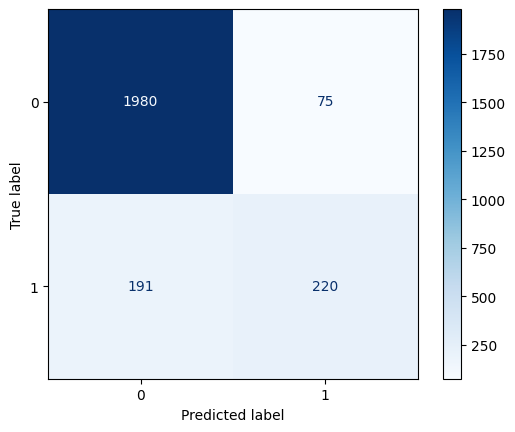

In [10]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# **Calculating accuracy**

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Rate: {accuracy:.4f}")

Accuracy Rate: 0.8921


# **Calculating precision, recall and f1-score and plotting the graph**

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



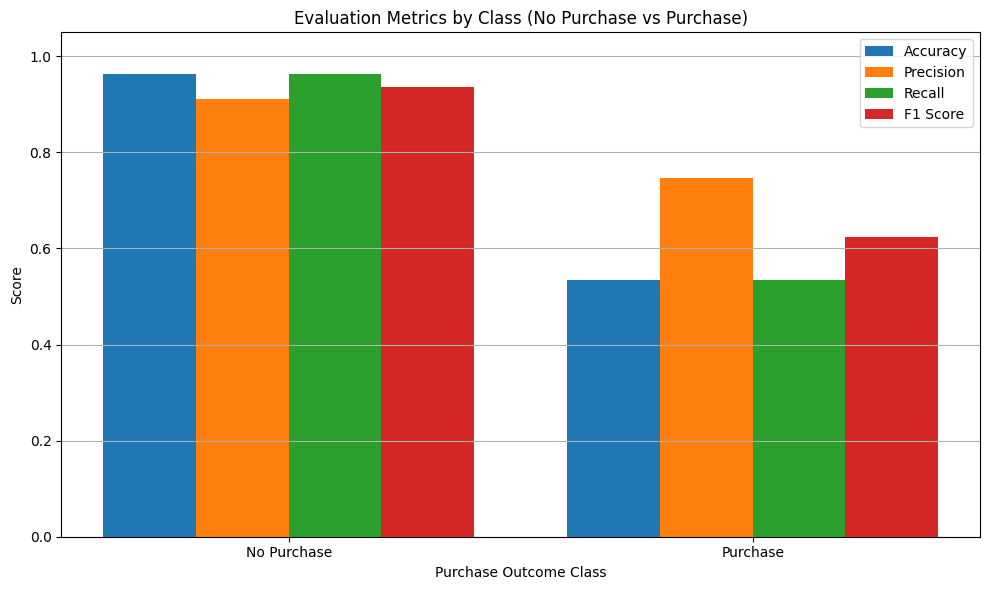

In [13]:
accuracy = cm.diagonal() / cm.sum(axis=1)
precision = precision_score(y_test, y_pred, average=None, labels=[0, 1])
recall = recall_score(y_test, y_pred, average=None, labels=[0, 1])
f1 = f1_score(y_test, y_pred, average=None, labels=[0, 1])

classes = ['No Purchase', 'Purchase']
x = np.arange(len(classes))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5 * width, precision, width, label='Precision')
plt.bar(x + 0.5 * width, recall, width, label='Recall')
plt.bar(x + 1.5 * width, f1, width, label='F1 Score')

plt.xlabel('Purchase Outcome Class')
plt.ylabel('Score')
plt.title('Evaluation Metrics by Class (No Purchase vs Purchase)')
plt.xticks(x, classes)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Analyzing Misclassifications**

In [14]:
misclassified_indices = np.where(y_pred != y_test)[0]
comparison_df = pd.DataFrame({'Predicted': y_pred[misclassified_indices], 'Actual': y_test[misclassified_indices]})
misclassified_rows = X_test[misclassified_indices]
misclassified_features = pd.DataFrame(scaler.inverse_transform(misclassified_rows), columns=dataset.drop('Revenue', axis=1).columns)
misclassified_full = pd.concat([comparison_df.reset_index(drop=True), misclassified_features.reset_index(drop=True)], axis=1)
misclassified_full.head(5)

,Predicted,Actual,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,1,6.0,437.391304,2.0,235.55,83.0,2503.881781,0.002198,0.004916,2.086218,0.0,5.0,2.0,2.0,3.0,2.0,2.0,-2.775558e-17
1,1,0,1.0,41.125000,0.0,0.00,126.0,4310.004668,0.000688,0.012823,3.451072,0.0,7.0,2.0,2.0,2.0,2.0,2.0,-2.775558e-17
2,1,0,2.0,141.000000,0.0,0.00,10.0,606.666667,0.008333,0.026389,36.672294,0.0,0.0,2.0,5.0,7.0,4.0,2.0,-2.775558e-17
3,0,1,4.0,75.100000,0.0,0.00,7.0,102.700000,0.000000,0.011111,0.000000,0.0,9.0,2.0,4.0,6.0,2.0,2.0,-2.775558e-17
4,0,1,0.0,0.000000,0.0,0.00,43.0,898.238889,0.007317,0.031707,8.898619,0.0,7.0,2.0,4.0,1.0,10.0,2.0,-2.775558e-17
